In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming each group is in a separate CSV file)
age_and_sex = pd.read_csv('age_and_sex.csv', index_col='CBSA')
commute = pd.read_csv('commute.csv', index_col='CBSA')
computers_and_internet = pd.read_csv('computers_and_internet.csv', index_col='CBSA')
# Repeat for other groups...


In [ ]:

def hierarchical_clustering(data, group_name='group'):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Perform Agglomerative Clustering to generate dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
    plt.title(f'{group_name} Dendrogram')
    plt.xlabel('CBSA')
    plt.ylabel('Euclidean Distances')
    plt.show()


In [ ]:

def cluster_group(data, n_clusters=5, group_name='group', method='kmeans'):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Choose clustering method
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'dbscan':
        model = DBSCAN(eps=0.5, min_samples=5)
    elif method == 'gmm':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
    else:
        raise ValueError("Invalid method. Choose from 'kmeans', 'dbscan', or 'gmm'.")
    
    # Fit the model and predict clusters
    if method == 'gmm':
        clusters = model.fit_predict(data_scaled)
    else:
        clusters = model.fit(data_scaled).fit_predict(data_scaled)
    
    # Add cluster labels to the original dataframe
    data[group_name + '_cluster'] = clusters
    
    # Return clustered data
    return data


In [ ]:

# Step 1: Hierarchical Clustering for exploration
hierarchical_clustering(age_and_sex, group_name='age_and_sex')
hierarchical_clustering(commute, group_name='commute')
hierarchical_clustering(computers_and_internet, group_name='computers_and_internet')
# Repeat for other groups...


In [ ]:

# Step 2: Cluster each group independently based on hierarchical insights
# Assume we decided on 5 clusters from the dendrogram
age_and_sex_clustered = cluster_group(age_and_sex, n_clusters=5, group_name='age_and_sex', method='kmeans')
commute_clustered = cluster_group(commute, n_clusters=5, group_name='commute', method='kmeans')
computers_and_internet_clustered = cluster_group(computers_and_internet, n_clusters=5, group_name='computers_and_internet', method='kmeans')
# Repeat for other groups...


In [ ]:

# Example: Plot the clusters for one group
plt.figure(figsize=(10, 6))
plt.hist(age_and_sex_clustered['age_and_sex_cluster'], bins=range(6), align='left', rwidth=0.8)
plt.xlabel('Cluster Label')
plt.ylabel('Number of CBSAs')
plt.title('Distribution of CBSAs by Age and Sex Clusters')
plt.show()

# Step 3: Combine clustered data
combined_data = age_and_sex_clustered[['age_and_sex_cluster']].join(commute_clustered[['commute_cluster']], how='inner')
combined_data = combined_data.join(computers_and_internet_clustered[['computers_and_internet_cluster']], how='inner')
# Repeat for other groups...

# Step 4: Normalize the combined data
combined_data_scaled = scaler.fit_transform(combined_data)

# Step 5: Cluster the combined data using KMeans (or another method based on insights)
combined_kmeans = KMeans(n_clusters=5, random_state=42)
combined_clusters = combined_kmeans.fit_predict(combined_data_scaled)

# Add combined cluster labels
combined_data['overall_cluster'] = combined_clusters

# Plot the distribution of CBSAs by overall clusters
plt.figure(figsize=(10, 6))
plt.hist(combined_data['overall_cluster'], bins=range(6), align='left', rwidth=0.8)
plt.xlabel('Overall Cluster Label')
plt.ylabel('Number of CBSAs')
plt.title('Distribution of CBSAs by Overall Clusters')
plt.show()


In [5]:
# Load the CBSA data from the parquet file
df = pd.read_parquet('cbsa.parquet')
df

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,...,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E,B01002_001E,B01002_002E,B01002_003E,B01003_001E,geometry
0,10100,701,755,544,488,345,1360,1491,1557,770,...,862,726,697,615,767,37.7,36.9,38.5,42864,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xb3\x00...
1,10140,1493,2072,1207,876,677,2006,2116,1992,1238,...,1970,2059,1436,986,836,44.3,42.6,45.8,73769,b'\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03...
2,10180,1998,2945,1856,1663,1195,5746,5033,5952,3266,...,2748,3169,2748,2043,2058,34.1,33.0,35.3,171354,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x9d\x00...
3,10220,476,667,474,487,232,1243,1306,1225,737,...,526,775,735,439,463,36.0,34.6,37.3,38385,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x11\x01...
4,10300,1786,2226,1368,998,682,2575,2709,2845,1830,...,2066,2208,1806,968,1536,42.1,40.2,43.7,98310,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x8e\x00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,49660,10359,13248,8912,5071,5739,13571,14218,14880,9866,...,10713,14890,11003,7882,11935,44.2,42.2,46.3,538115,b'\x01\x03\x00\x00\x00\x01\x00\x00\x001\x01\x0...
935,49700,2276,2686,1748,1200,1413,6066,6644,6116,3426,...,2657,3354,2341,1567,1846,34.6,33.6,35.7,173839,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00i\x03\x0...
936,49740,2753,4629,4486,3250,2191,7456,6941,7395,4369,...,3774,4889,5098,3097,2302,34.8,33.2,36.8,211931,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x04\x01...
937,49780,1389,1710,1202,693,628,2571,2734,2696,1573,...,1724,2071,1519,1068,1335,40.5,39.2,42.0,86033,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00}\x00\x0...


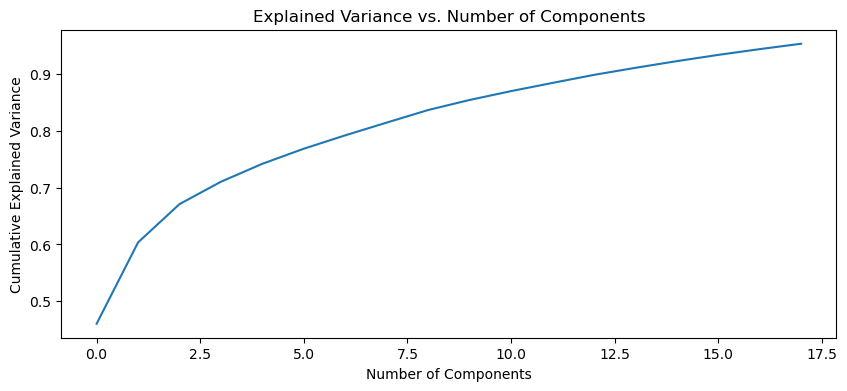

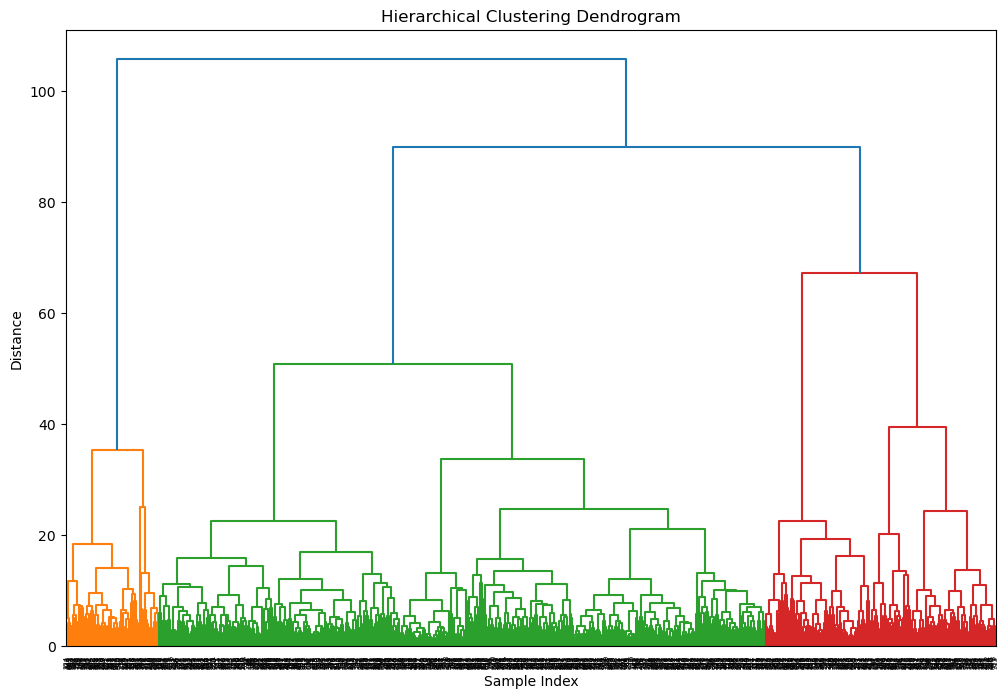

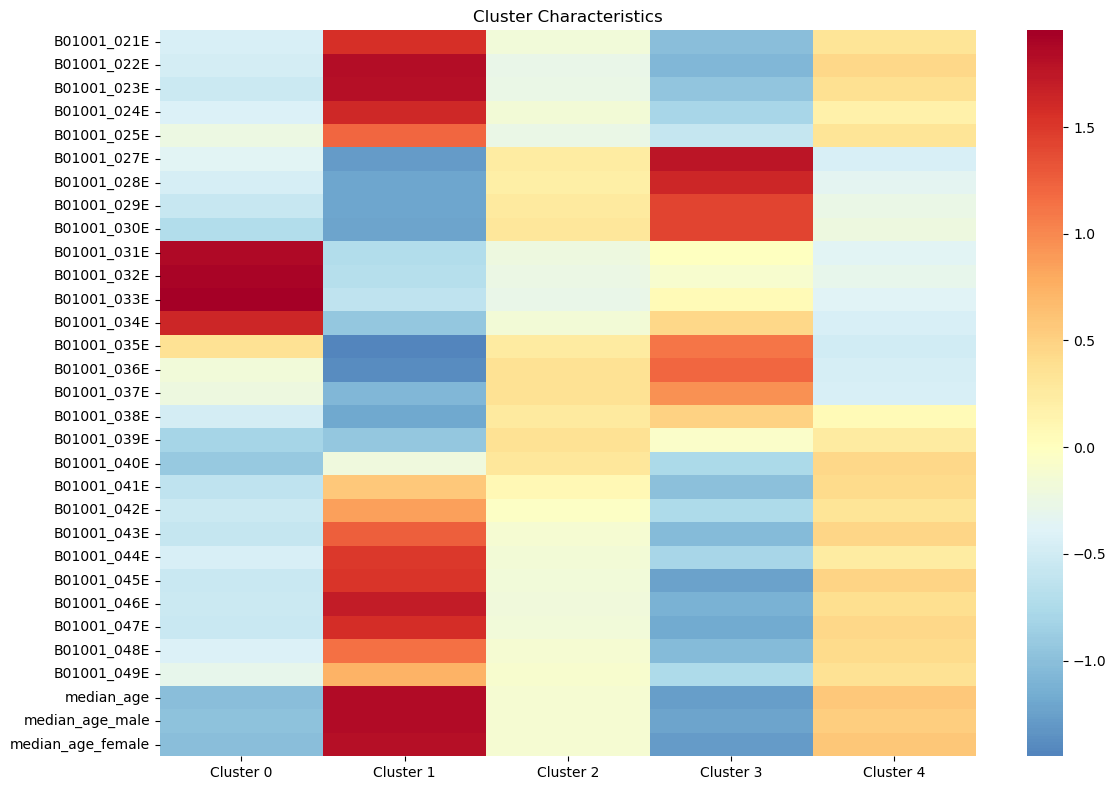

In [6]:
results, cluster_means, pca = main(df, n_clusters=5)